# 1. Importando as bibliotecas

In [75]:
from ipywidgets import IntSlider, interact, FloatSlider, Checkbox
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from skimage.color import rgb2gray
from statistics import mean

## 1.1. Carregando a imagem

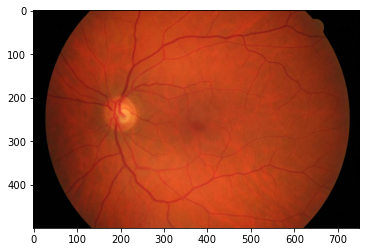

In [55]:
img = cv2.cvtColor(cv2.imread('09.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

## 1.2. Passando para escala de cinza

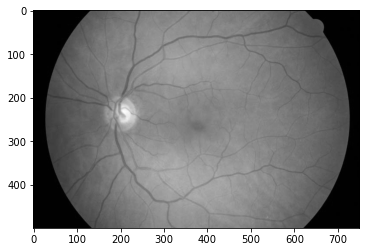

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

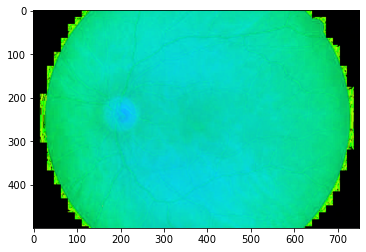

In [57]:
hrv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hrv, cmap='gray')

# 2. Metodos de segmentação [**TESTES**]

In [58]:
@interact(brilho=IntSlider(min=-100, max=100, step=1, value=0), 
 con=IntSlider(min=-50, max=50, step=1, value=1))
def brilho_const(brilho, con):
  img_bri = (gray * con) + brilho
  plt.imshow(img_bri, cmap='gray')
  plt.axis('off')

interactive(children=(IntSlider(value=0, description='brilho', min=-100), IntSlider(value=1, description='con'…

## 2.1. Limiarização

In [59]:
@interact(limiar=IntSlider(min=0, max=255, step=1, value=107))
def limiarizacao_binary(limiar):
    thresh_binary = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)[1]
    plt.imshow(thresh_binary, cmap='gray')
    plt.axis('off')


interactive(children=(IntSlider(value=107, description='limiar', max=255), Output()), _dom_classes=('widget-in…

In [60]:
@interact(limiar=IntSlider(min=0, max=255, step=1, value=107))
def limiarizacao_trunc(limiar):
    thresh_binary = cv2.threshold(gray, limiar, 255, cv2.THRESH_TRUNC)[1]
    plt.imshow(thresh_binary, cmap='gray')
    plt.axis('off')


interactive(children=(IntSlider(value=107, description='limiar', max=255), Output()), _dom_classes=('widget-in…

In [61]:
kernel = np.ones((3,3), np.uint8)
@interact(limiar=IntSlider(min=0, max=255, step=1, value=107), abertura=Checkbox(), fechado=Checkbox(), it=IntSlider(min=0, max=255, step=1, value=1))
def exibir_limiarizacao_gray_pure(limiar, abertura, fechado, it):
  if abertura:
    img_transf = cv2.erode(gray, kernel, iterations=it)
    img_transf = cv2.dilate(img_transf, kernel, iterations=it)
  elif fechado:
    img_transf = cv2.dilate(gray, kernel, iterations=it)
    img_transf = cv2.erode(img_transf, kernel, iterations=it)
  else:
    img_transf = gray
  _, thresh_binary = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_BINARY)
  _, thresh_binary_inv = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_BINARY_INV)
  _, thresh_trunc = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TRUNC)
  _, thresh_to_zero = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TOZERO)
  _, thresh_to_zero_inv = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TOZERO_INV)

  titulos = ['Imagem original', 'Aberta ou fechada', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
  imagens = [gray, img_transf, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_to_zero, thresh_to_zero_inv]

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
  plt.show()

interactive(children=(IntSlider(value=107, description='limiar', max=255), Checkbox(value=False, description='…

In [62]:
@interact(limiar=IntSlider(min=0, max=255, step=1, value=107),
 brilho=IntSlider(min=-50, max=50, step=1, value=0), 
 const=FloatSlider(min=-20, max=20, step=0.1, value=1))
def exibir_limiarizacao_gray_transf(limiar, brilho, const):
  img_transf = (gray * const) + brilho
  _, thresh_binary = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_BINARY)
  _, thresh_binary_inv = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_BINARY_INV)
  _, thresh_trunc = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TRUNC)
  _, thresh_to_zero = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TOZERO)
  _, thresh_to_zero_inv = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_TOZERO_INV)

  titulos = ['Imagem original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
  imagens = [img_transf, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_to_zero, thresh_to_zero_inv]

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(imagens[i], cmap = 'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
  plt.show()

interactive(children=(IntSlider(value=107, description='limiar', max=255), IntSlider(value=0, description='bri…

## 2.2. Limiariazação adaptativa

### 2.2.1. Media

In [63]:
# Pega bem as veias: bloco = 15, const = 5
@interact(bloco=IntSlider(min=3, max=51, step=2, value=15), const=IntSlider(min=0, max=25, step=1, value=5))
def limiarizacao_adap_media(bloco, const):
    adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)
    plt.imshow(adapt, cmap='gray')
    plt.axis('off')


interactive(children=(IntSlider(value=15, description='bloco', max=51, min=3, step=2), IntSlider(value=5, desc…

In [64]:
# Para pegar a flovia do olho: bloco = 13, const = 62, con = 3
# Para pegar a disco do olho: bloco = 13, const = 62, con = 2   ou bloco = 499, const = 36, con = 2
@interact(bloco=IntSlider(min=3, max=500, step=2, value=13), 
 const=IntSlider(min=-500, max=500, step=1, value=62),
 con=IntSlider(min=1, max=50, step=1, value=3))
def exibir_limiarizacao_gray_transf(bloco, const, con):
  img_transf = (gray * con)
  adapt = cv2.adaptiveThreshold(img_transf, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)
  plt.imshow(adapt, cmap='gray')
  plt.axis('off')

interactive(children=(IntSlider(value=13, description='bloco', max=500, min=3, step=2), IntSlider(value=62, de…

### 2.2.2. Gaussiana

In [65]:
@interact(bloco=IntSlider(min=3, max=51, step=2, value=25), const=IntSlider(min=0, max=25, step=1, value=5))
def limiarizacao_adap_gaus(bloco, const):
    adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, bloco, const)
    plt.imshow(adapt, cmap='gray')
    plt.axis('off')



interactive(children=(IntSlider(value=25, description='bloco', max=51, min=3, step=2), IntSlider(value=5, desc…

## 2.3. Por Contorno

In [79]:
# DISCO EXTERNO
blur = cv2.GaussianBlur(gray, (7,7), 0)
kernel = np.ones((3,3), np.uint8)
@interact(
    limiar=IntSlider(min=0, max=255, step=1, value=107), 
    con=IntSlider(min=0, max=10, step=1, value=1),
    brilho=IntSlider(min=0, max=50, step=1, value=0), 
    abertura=Checkbox(),
    fechado=Checkbox(value=True),
    it_erode=IntSlider(min=0, max=255, step=1, value=1), 
    it_dil=IntSlider(min=0, max=255, step=1, value=4), 
    maior=IntSlider(min=5, max=3000, step=25, value=80), 
    menor=IntSlider(min=5, max=3000, step=25, value=180)
    )
def contorno_lim_global(limiar, con, brilho, abertura, fechado, it_erode,it_dil, maior, menor):
    img_processada = img.copy()
    blur_transf =  (blur * con) + brilho
    if abertura:
        img_transf = cv2.erode(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.dilate(img_transf, kernel, iterations=it_dil)
    elif fechado:
        img_transf = cv2.dilate(blur_transf, kernel, iterations=it_dil)
        img_transf = cv2.erode(img_transf, kernel, iterations=it_erode)
    else:
        img_transf = blur_transf
    thresh_binary = cv2.threshold(img_transf, limiar, 255, cv2.THRESH_BINARY)[1]
    contornos, hierarquia = cv2.findContours(thresh_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if len(cnt) > maior and len(cnt) < menor:
            elipse = cv2.fitEllipse(cnt)
            print(f'Tem um diametro medio {round(mean(list(elipse[1])), 2)} pela media do diametro vertical e horizontal')
            cv2.ellipse(img_processada, elipse, (0,255,0), 2)
    
    titulos = ['Img original', 'Img Brilho-Con', 'Img Transf', 'Img Thresh', 'Img Process']
    imagens = [img, blur_transf, img_transf, thresh_binary, img_processada]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

    # Disco = limiar = 107, con=1, brilho=0, fechado=True, it_erose=1, it_dil=4 maior=80 e menor=180


interactive(children=(IntSlider(value=107, description='limiar', max=255), IntSlider(value=1, description='con…

In [84]:
# COPA
blur = cv2.GaussianBlur(gray, (7,7), 0)
kernel = np.ones((3,3), np.uint8)
@interact(
    bloco=IntSlider(min=3, max=500, step=2, value=115), 
    const=IntSlider(min=-500, max=500, step=1, value=-1),
    con=IntSlider(min=0, max=50, step=1, value=1),
    brilho=IntSlider(min=0, max=50, step=1, value=0), 
    abertura=Checkbox(),
    fechado=Checkbox(value=True),
    it_erode=IntSlider(min=0, max=255, step=1, value=4), 
    it_dil=IntSlider(min=0, max=255, step=1, value=5), 
    maior=IntSlider(min=5, max=3000, step=5, value=110), 
    menor=IntSlider(min=5, max=3000, step=25, value=130)
    )
def contorno_lim_adapt(bloco,const, con, brilho, abertura, fechado, it_erode,it_dil, maior, menor):
    img_processada = img.copy()
    blur_transf =  (blur * con) + brilho
    if abertura:
        img_transf = cv2.erode(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.dilate(img_transf, kernel, iterations=it_dil)
    elif fechado:
        img_transf = cv2.dilate(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.erode(img_transf, kernel, iterations=it_dil)
    else:
        img_transf = blur_transf
    adapt = cv2.adaptiveThreshold(img_transf, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)
    contornos, hierarquia = cv2.findContours(adapt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if len(cnt) > maior and len(cnt) < menor:
            elipse = cv2.fitEllipse(cnt)
            print(f'Tem um diametro medio {round(mean(list(elipse[1])), 2)} pela media do diametro vertical e horizontal')
            cv2.ellipse(img_processada, elipse, (0,255,0), 2)
    
    titulos = ['Img original', 'Img Brilho-Con', 'Img Transf', 'Img Thresh', 'Img Process']
    imagens = [img, blur_transf, img_transf, adapt, img_processada]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

    # Disco Grande: bloco = 115, const=-1, con=1, brilho=0, fechado=True, it_erose=4, it_dil=5, maior=110 e menor=130


interactive(children=(IntSlider(value=115, description='bloco', max=500, min=3, step=2), IntSlider(value=-1, d…

In [81]:
# DISCO
blur = cv2.GaussianBlur(gray, (7,7), 0)
kernel = np.ones((3,3), np.uint8)
@interact(
    bloco=IntSlider(min=3, max=500, step=2, value=101), 
    const=IntSlider(min=-500, max=500, step=1, value=-45),
    con=IntSlider(min=0, max=50, step=1, value=1),
    brilho=IntSlider(min=0, max=50, step=1, value=0), 
    abertura=Checkbox(value=True),
    fechado=Checkbox(),
    it_erode=IntSlider(min=0, max=255, step=1, value=1), 
    it_dil=IntSlider(min=0, max=255, step=1, value=1), 
    maior=IntSlider(min=5, max=3000, step=5, value=15), 
    menor=IntSlider(min=5, max=3000, step=25, value=45)
    )
def contorno_lim_adapt(bloco,const, con, brilho, abertura, fechado, it_erode,it_dil, maior, menor):
    img_processada = img.copy()
    blur_transf =  (blur * con) + brilho
    if abertura:
        img_transf = cv2.erode(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.dilate(img_transf, kernel, iterations=it_dil)
    elif fechado:
        img_transf = cv2.dilate(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.erode(img_transf, kernel, iterations=it_dil)
    else:
        img_transf = blur_transf
    adapt = cv2.adaptiveThreshold(img_transf, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)
    contornos, hierarquia = cv2.findContours(adapt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if len(cnt) > maior and len(cnt) < menor:
           elipse = cv2.fitEllipse(cnt)
           print(f'Tem um diametro medio {round(mean(list(elipse[1])), 2)} pela media do diametro vertical e horizontal')

           cv2.ellipse(img_processada, elipse, (0,255,0), 2)
    
    titulos = ['Img original', 'Img Brilho-Con', 'Img Transf', 'Img Thresh', 'Img Process']
    imagens = [img, blur_transf, img_transf, adapt, img_processada]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    # Disco Menor : = bloco = 101, const=-45, con=1, brilho=0, Abertura=True, it_erose=1, it_dil=1, maior=15 e menor=45


interactive(children=(IntSlider(value=101, description='bloco', max=500, min=3, step=2), IntSlider(value=-45, …

In [68]:
# FOVEA
blur = cv2.GaussianBlur(gray, (7,7), 0)
kernel = np.ones((3,3), np.uint8)
@interact(
    bloco=IntSlider(min=3, max=500, step=2, value=11), 
    const=IntSlider(min=-500, max=500, step=1, value=-41),
    con=IntSlider(min=1, max=50, step=1, value=3),
    brilho=IntSlider(min=1, max=50, step=1, value=0), 
    abertura=Checkbox(value=True), 
    fechado=Checkbox(), 
    it=IntSlider(min=0, max=255, step=1, value=4), 
    maior=IntSlider(min=5, max=3000, step=10, value=30), 
    menor=IntSlider(min=5, max=3000, step=10, value=55))
def contorno_lim_adapt(bloco, const, con, brilho, abertura, fechado, it, maior, menor):
    img_processada = img.copy()
    if abertura:
        img_transf = cv2.erode(blur, kernel, iterations=it)
        img_transf = cv2.dilate(img_transf, kernel, iterations=it)
    elif fechado:
        img_transf = cv2.dilate(blur, kernel, iterations=it)
        img_transf = cv2.erode(img_transf, kernel, iterations=it)
    else:
        img_transf = blur
    
    img_transf =  (img_transf * con) + brilho
    adapt = cv2.adaptiveThreshold(img_transf, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)
    contornos, hierarquia = cv2.findContours(adapt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if len(cnt) > maior and len(cnt) < menor:
            elipse = cv2.fitEllipse(cnt)
            cv2.ellipse(img_processada, elipse, (0,255,0), 3)
    
    titulos = ['Img original', 'Img Transf', 'Img Thresh', 'Img Process']
    imagens = [img, img_transf, adapt, img_processada]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(4):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

    # Fovea = bloco = 11, const = -41, con = 3, brilho=1, abertura = True, it = 4, maior = 30, menor=55
    # Diametro maior = bloco = 99, const = -41. con=4, brilho=4, fechado = True, it = 4, maior = 5, menor=305
    # Diametro maior = bloco = 99, const = -41. con=13, brilho=34, fechado = True, it = 4, maior = 130, menor=305


interactive(children=(IntSlider(value=11, description='bloco', max=500, min=3, step=2), IntSlider(value=-41, d…

## 2.4. Sobel

(-0.5, 749.5, 499.5, -0.5)

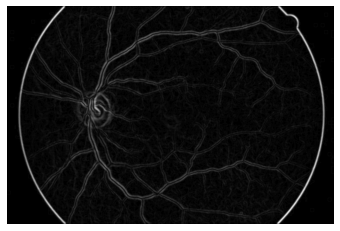

In [42]:
sobel_x = cv2.convertScaleAbs(cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3))
sobel_y = cv2.convertScaleAbs(cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3))
sobel = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2= sobel_y, beta=0.5, gamma=0)
plt.imshow(sobel, cmap='gray')
plt.axis('off')

## 2.5. Canny Edge

(-0.5, 749.5, 499.5, -0.5)

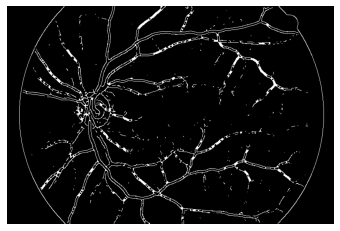

In [190]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
canny = cv2.Canny(blur, 16, 16)
dilatacao = cv2.dilate(canny, kernel, iterations=1)
erode = cv2.erode(dilatacao, kernel, iterations=1)
plt.imshow(erode, cmap='gray')
plt.axis('off')

(-0.5, 749.5, 499.5, -0.5)

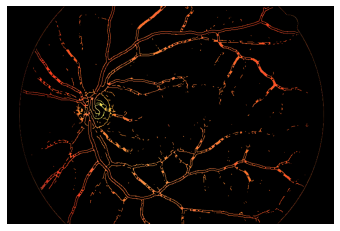

In [192]:
img_final = cv2.add(img, img, mask=erode)
plt.imshow(img_final, cmap='gray')
plt.axis('off')

(-0.5, 749.5, 499.5, -0.5)

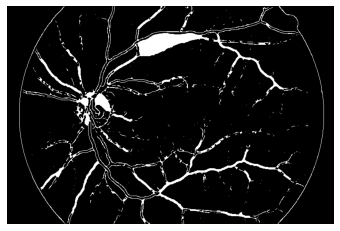

In [193]:
contornos, hierarquia = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
mascara = np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)
cv2.drawContours(mascara, contornos, -1, color = (255, 255, 255), thickness=cv2.FILLED)
plt.imshow(mascara, cmap='gray')
plt.axis('off')


In [43]:
@interact(lim_menor=IntSlider(min=0, max=20, step=1, value=1), 
lim_maior=IntSlider(min=0, max=255, step=1, value=255),
it_dil=IntSlider(min=0, max=255, step=1, value=1), 
it_erode=IntSlider(min=0, max=255, step=1, value=1))
def segmentacao_bordas(lim_menor,lim_maior, it_dil, it_erode):
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    sobel_x = cv2.convertScaleAbs(cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3))
    sobel_y = cv2.convertScaleAbs(cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3))
    sobel = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2= sobel_y, beta=0.5, gamma=0)

    canny = cv2.Canny(sobel, lim_menor, lim_maior)

    kernel = np.ones((3,3), np.uint8)

    # Fechamento
    dilatacao = cv2.dilate(canny, kernel, iterations=it_dil)
    erosao = cv2.erode(dilatacao, kernel, iterations=it_erode)


    titulos = ['Img original', 'Img Sobel', 'Img Canny Edge', 'Img Canny Edge + Fechamento']
    imagens = [img, sobel, canny, erosao]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(4):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=1, description='lim_menor', max=20), IntSlider(value=255, description='l…

## 2.6. Por região

In [44]:
def flatten_img(img):
    altura, largura = img.shape[0], img.shape[1]
    return gray.reshape(altura * largura)

def segmenta6regioes(img):
  pixels = flatten_img(img).copy()
  for i in range(len(pixels)):
    if pixels[i] > 0.8:
      pixels[i] = 5
    elif pixels[i] > 0.6:
      pixels[i] = 4
    elif pixels[i] > 0.4:
      pixels[i] = 3
    elif pixels[i] > 0.2:
      pixels[i] = 2
    elif pixels[i] > 0.1:
      pixels[i] = 1
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

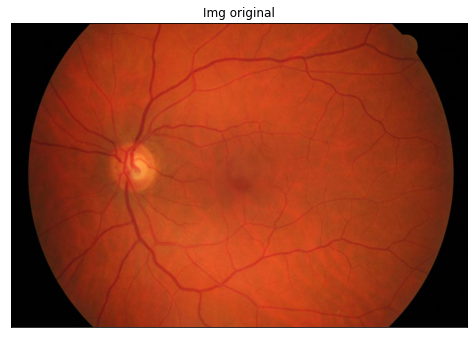

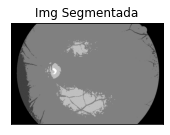

In [45]:
gray = rgb2gray(img)
seg_regiao = segmenta6regioes(gray)
titulos = ['Img original', 'Img Segmentada']
imagens = [img, seg_regiao]

fig = plt.gcf()
fig.set_size_inches(18,12)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(imagens[i], cmap = 'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

## 2.7. Por Cluster

In [46]:
def segmentacao_cluster(img, k):
  vetorizado = np.float32(img).reshape(-1,3)
  criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
  ret,label,centros = cv2.kmeans(vetorizado, k , None, criterio,10,cv2.KMEANS_RANDOM_CENTERS)
  centros = np.uint8(centros)
  img_final = centros[label.flatten()]
  img_final = img_final.reshape(img.shape)
  return img_final

(-0.5, 749.5, 499.5, -0.5)

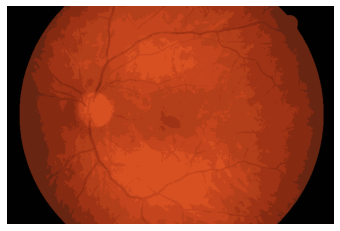

In [47]:
img_final = segmentacao_cluster(img, 7)
plt.imshow(img_final, cmap='gray')
plt.axis('off')

# 3. Trabalho [**FINAL**]

In [82]:
img = cv2.cvtColor(cv2.imread('09.jpg'), cv2.COLOR_BGR2RGB)

# Para os filtros
kernel = np.ones((3,3), np.uint8)

In [86]:
def contorno_lim_adapt(img, bloco,const, con, brilho, abertura, fechado, it_erode,it_dil, maior, menor):
    # Inicializações
    img_processada = img.copy()
    kernel = np.ones((3,3), np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Aplicação do Brilho e Contraste 
    blur_transf =  (blur * con) + brilho

    # Aplicação das operações morfologicas de abertura ou fechamento
    if abertura:
        img_transf = cv2.erode(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.dilate(img_transf, kernel, iterations=it_dil)
    elif fechado:
        img_transf = cv2.dilate(blur_transf, kernel, iterations=it_erode)
        img_transf = cv2.erode(img_transf, kernel, iterations=it_dil)
    else:
        img_transf = blur_transf

    # Aplicação da segmentação adaptativa
    adapt = cv2.adaptiveThreshold(img_transf, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bloco, const)

    # Criando os contornos
    contornos, hierarquia = cv2.findContours(adapt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if len(cnt) > maior and len(cnt) < menor:
           elipse = cv2.fitEllipse(cnt)
           print(f'Tem um diametro medio {round(mean(list(elipse[1])), 2)} pela media do diametro vertical e horizontal')

           cv2.ellipse(img_processada, elipse, (0,255,0), 2)
    
    titulos = ['Img Original RGB', 'Img Brilho-Contraste', 'Img Operação', 'Img Adap-Thresh', 'Img Contorno']
    imagens = [img, blur_transf, img_transf, adapt, img_processada]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

## 3.1. Diametro do copo

Tem um diametro medio 75.53 pela media do diametro vertical e horizontal


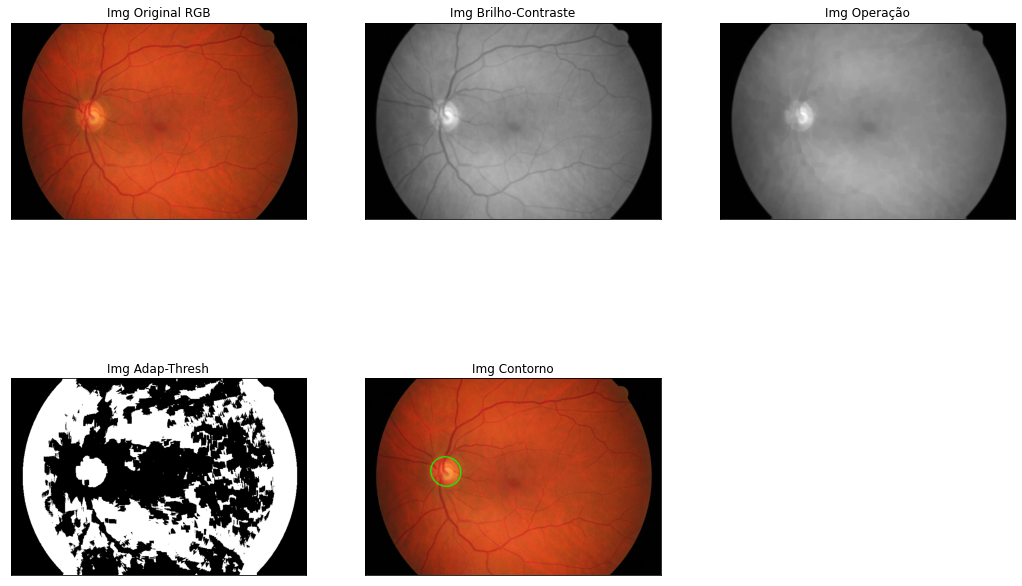

In [87]:
contorno_lim_adapt(img, bloco=115,const=-1, con=1, brilho=0, abertura=False, fechado=True, it_erode=4,it_dil=5, maior=110, menor=130)

## 3.2. Diametro do disco

Tem um diametro medio 27.55 pela media do diametro vertical e horizontal


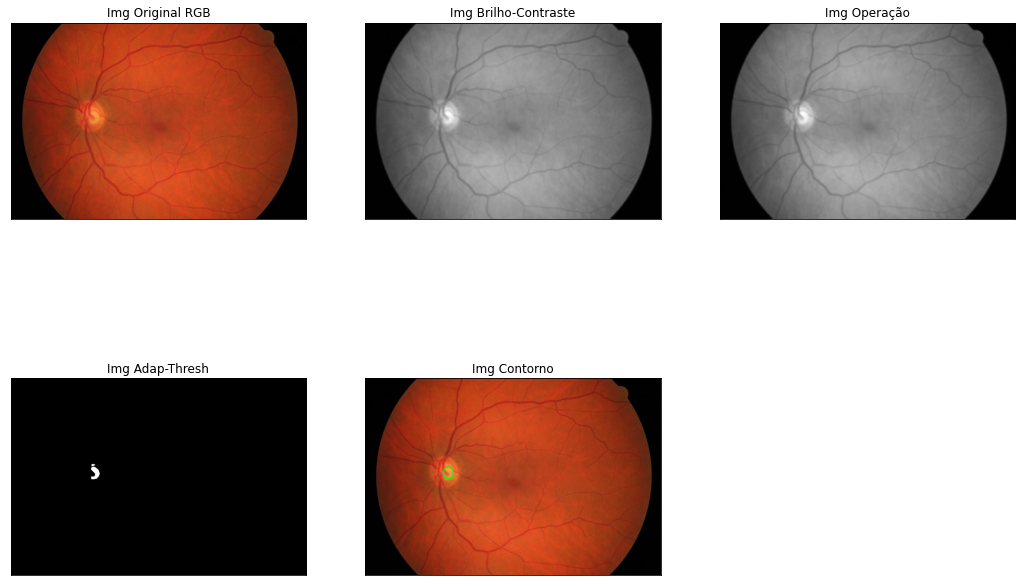

In [89]:
contorno_lim_adapt(img, bloco=101,const=-45, con=1, brilho=0, abertura=True, fechado=False, it_erode=1,it_dil=1, maior=15, menor=45)

## 3.3. Vasos

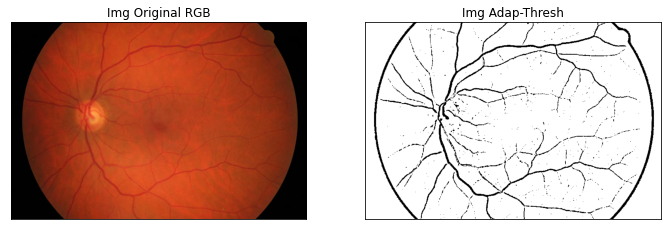

In [97]:
def limiarizacao_adap_gaus(img, bloco, const):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, bloco, const)
    titulos = ['Img Original RGB', 'Img Adap-Thresh']
    imagens = [img, adapt]

    fig = plt.gcf()
    fig.set_size_inches(18,12)

    for i in range(2):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagens[i], cmap = 'gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
limiarizacao_adap_gaus(img, bloco=25, const=5)

## 3.4. Fovea

Tem um diametro medio 27.1 pela media do diametro vertical e horizontal


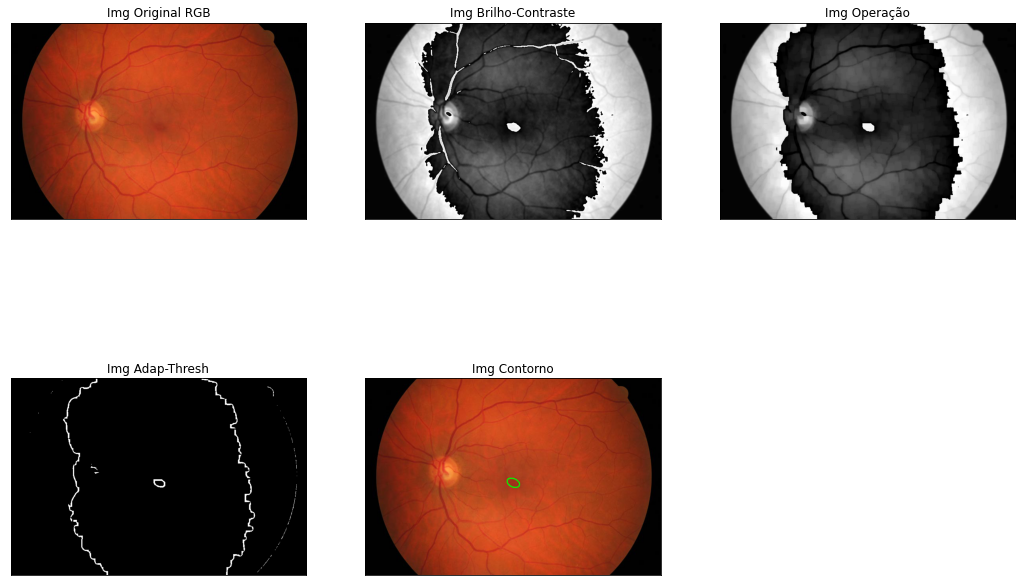

In [94]:
contorno_lim_adapt(img, bloco=11,const=-41, con=3, brilho=1, abertura=True, fechado=False, it_erode=4,it_dil=4, maior=20, menor=25)